In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\Divya Chandrasekaran\\Downloads\\cfpb_data_with_clean_zip.csv')
df.shape

(2036509, 21)

In [3]:
df.columns

Index(['Date.received', 'Product', 'Sub.product', 'Issue', 'Sub.issue',
       'Consumer.complaint.narrative', 'Company.public.response', 'Company',
       'State', 'ZIP.code', 'Tags', 'Consumer.consent.provided.',
       'Submitted.via', 'Date.sent.to.company', 'Company.response.to.consumer',
       'Timely.response.', 'Consumer.disputed.', 'Complaint.ID', 'zip_best',
       'zip_three_best', 'zip_state_best'],
      dtype='object')

In [4]:
df.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
df.head(5)

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,...,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,zip_best,zip_three_best,zip_state_best
0,12/07/21,Mortgage,VA mortgage,Trouble during payment process,None,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,78666,...,NaN,Phone,12/07/21,Closed with explanation,Yes,NaN,4983111,78666,786,TX
1,07/22/22,Debt collection,Auto debt,Communication tactics,Frequent or repeated calls,NaN,None,Santander Consumer USA Holdings Inc.,NY,11692,...,NaN,Referral,08/04/22,Closed with explanation,Yes,NaN,5800836,11692,116,NY
2,10/27/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,"EQUIFAX, INC.",VA,22625,...,Consent not provided,Web,10/27/21,Closed with explanation,Yes,NaN,4849405,22625,226,VA
3,01/05/19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,22625,...,Consent not provided,Web,01/05/19,Closed with non-monetary relief,Yes,NaN,3117279,22625,226,VA
4,11/08/20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,22625,...,Consent not provided,Web,11/08/20,Closed with explanation,Yes,NaN,3942742,22625,226,VA


In [5]:
df_population = pd.read_csv('C:\\Users\\Divya Chandrasekaran\\Downloads\\census_data_by_zip.csv', encoding='ISO-8859-1')

In [6]:
df_population.shape

(33774, 20)

In [7]:
df_population.columns

Index(['zip', 'pop', 'pop_moe', 'pop_white', 'pop_black_or_aa', 'pop_ai_or_an',
       'pop_asian', 'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol',
       'pop_not_hol', 'income_cnt_households', 'income_cnt_households_moe',
       'income_cnt_households_with_earnings',
       'income_cnt_households_with_earnings_moe',
       'income_cnt_households_with_pub_assist',
       'income_cnt_households_with_pub_assist_moe',
       'income_mean_household_dollars', 'income_mean_household_dollars_moe'],
      dtype='object')

In [8]:
df['zip_best'] = df['zip_best'].astype(str)
df_population['zip'] = df_population['zip'].astype(str)
# Lets merge 2 dfs based on 'zip_best' and 'zip' columns
df_joined = pd.merge(df, df_population, left_on='zip_best', right_on='zip', how='inner')

In [9]:
df_joined.columns

Index(['Date_received', 'Product', 'Sub_product', 'Issue', 'Sub_issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'Consumer_consent_provided_',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response_', 'Consumer_disputed_', 'Complaint_ID', 'zip_best',
       'zip_three_best', 'zip_state_best', 'zip', 'pop', 'pop_moe',
       'pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian',
       'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol', 'pop_not_hol',
       'income_cnt_households', 'income_cnt_households_moe',
       'income_cnt_households_with_earnings',
       'income_cnt_households_with_earnings_moe',
       'income_cnt_households_with_pub_assist',
       'income_cnt_households_with_pub_assist_moe',
       'income_mean_household_dollars', 'income_mean_household_dollars_moe'],
      dtype='object')

In [10]:
df_joined.shape

(1800487, 41)

In [11]:
pd.set_option('display.max_columns', None)
df_joined.head(5)

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,zip_best,zip_three_best,zip_state_best,zip,pop,pop_moe,pop_white,pop_black_or_aa,pop_ai_or_an,pop_asian,pop_nh_or_opi,pop_other,pop_multiple,pop_hol,pop_not_hol,income_cnt_households,income_cnt_households_moe,income_cnt_households_with_earnings,income_cnt_households_with_earnings_moe,income_cnt_households_with_pub_assist,income_cnt_households_with_pub_assist_moe,income_mean_household_dollars,income_mean_household_dollars_moe
0,12/07/21,Mortgage,VA mortgage,Trouble during payment process,None,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,78666,"Older American, Servicemember",NaN,Phone,12/07/21,Closed with explanation,Yes,NaN,4983111,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
1,10/05/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair credit Reporting A...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,78666,None,Consent provided,Web,10/05/22,Closed with explanation,Yes,NaN,6053437,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
2,08/22/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78666,None,Consent not provided,Web,08/22/22,Closed with non-monetary relief,Yes,NaN,5902961,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
3,10/14/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,"On XX/XX/2022, I first sent a letter regarding...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78666,None,Consent provided,Web,10/14/22,Closed with non-monetary relief,Yes,NaN,6087171,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
4,09/09/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair credit Reporting A...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,78666,None,Consent provided,Web,09/09/22,Closed with non-monetary relief,Yes,NaN,5965797,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0


In [12]:
#zip_601_rows = df_joined[df_joined['ZIP code'] == '601']
#print(zip_601_rows)
#empty dataframe

In [13]:
#zip_601_rows = df_joined[df_joined['ZIP code'] == '00601']
#print(zip_601_rows)
# Nope 

In [14]:
# Count occurrences of each product
product_counts = df_joined['Product'].value_counts()

# Sort the products by complaint count in descending order
sorted_products = product_counts.sort_values(ascending=False)

# Lets het top 10 products
top_10_products = sorted_products.head(10)

print("Top 10 products with the highest number of complaints:")
print(top_10_products)

Top 10 products with the highest number of complaints:
Credit reporting, credit repair services, or other personal consumer reports    1217786
Debt collection                                                                  204011
Credit card or prepaid card                                                      109732
Checking or savings account                                                       95473
Mortgage                                                                          81340
Money transfer, virtual currency, or money service                                31232
Vehicle loan or lease                                                             24416
Student loan                                                                      20217
Payday loan, title loan, or personal loan                                         16280
Name: Product, dtype: int64


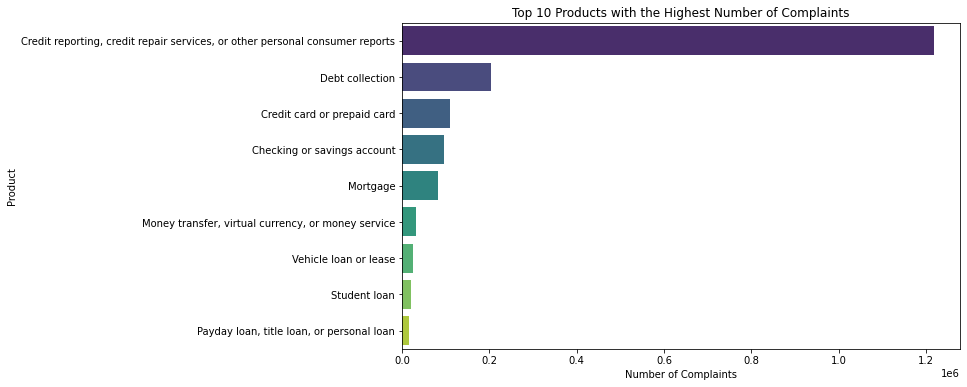

In [15]:
# EDA maxnumber of complaints based on products

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='viridis')
plt.title('Top 10 Products with the Highest Number of Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()




In [16]:
# Removing unnecessary columns 
columns_to_drop = ['Tags', 'Company_public_response', 'Consumer_disputed_', 'pop_moe', 'income_cnt_households_moe',                   
                   'income_cnt_households_with_earnings_moe', 'income_cnt_households_with_pub_assist_moe',
                   'income_mean_household_dollars_moe']

# new DataFrame with the dropped columns
df_final = df_joined.drop(columns=columns_to_drop)

print(df_final.columns)

Index(['Date_received', 'Product', 'Sub_product', 'Issue', 'Sub_issue',
       'Consumer_complaint_narrative', 'Company', 'State', 'ZIP_code',
       'Consumer_consent_provided_', 'Submitted_via', 'Date_sent_to_company',
       'Company_response_to_consumer', 'Timely_response_', 'Complaint_ID',
       'zip_best', 'zip_three_best', 'zip_state_best', 'zip', 'pop',
       'pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian',
       'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol', 'pop_not_hol',
       'income_cnt_households', 'income_cnt_households_with_earnings',
       'income_cnt_households_with_pub_assist',
       'income_mean_household_dollars'],
      dtype='object')


In [17]:
# Group by zip and count complaints
complaint_counts = df_final.groupby('zip_best').size().reset_index(name='complaint_count')

# Merge with census 
merged_data = pd.merge(complaint_counts, df_final, on='zip_best', how='left')

# correlation coefficients
correlation_matrix = merged_data.corr()

complaint_count_correlation = correlation_matrix['complaint_count']

# correlations in descending order
sorted_correlation = complaint_count_correlation.abs().sort_values(ascending=False)

print("Top correlations with complaint counts:")
print(sorted_correlation)


Top correlations with complaint counts:
complaint_count                          1.000000
pop_black_or_aa                          0.696285
pop_not_hol                              0.450791
income_cnt_households_with_pub_assist    0.442653
pop                                      0.436721
income_cnt_households                    0.428094
income_cnt_households_with_earnings      0.419004
pop_multiple                             0.190062
income_mean_household_dollars            0.168418
pop_hol                                  0.138891
pop_other                                0.115688
pop_white                                0.099903
pop_asian                                0.055262
pop_nh_or_opi                            0.045698
Complaint_ID                             0.027920
pop_ai_or_an                             0.006514
Name: complaint_count, dtype: float64


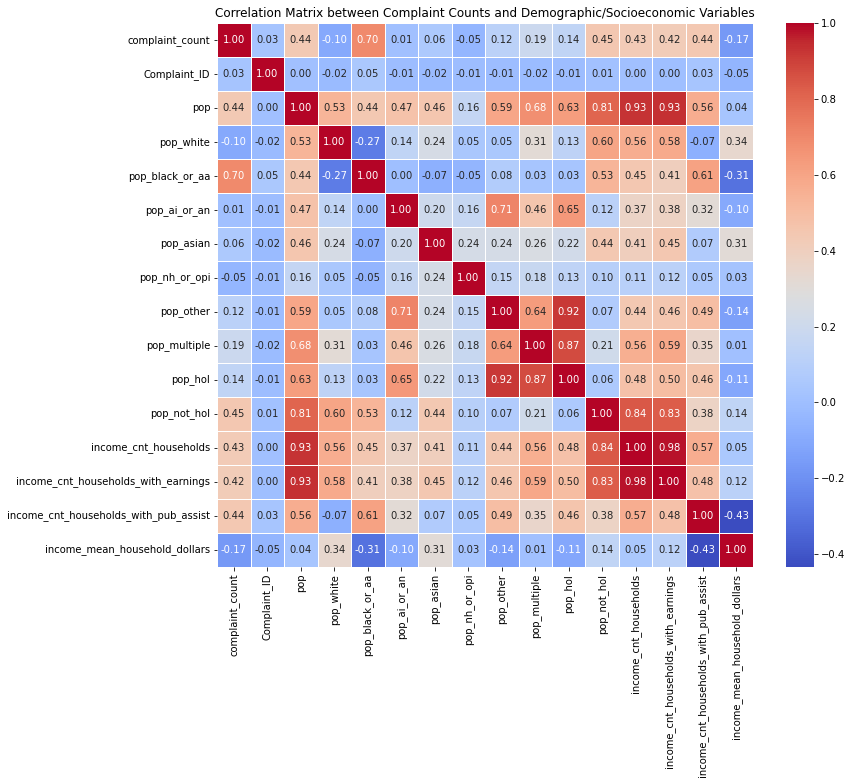

In [18]:
correlation_matrix = merged_data.corr()

#  heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Complaint Counts and Demographic/Socioeconomic Variables')
plt.show()

Looks like The variable 'pop_black_or_aa' (population count of Black or African American individuals) has a very high positive correlation coefficient of 0.697827 with complaint counts. This suggests that areas with a higher population of Black or African American individuals tend to have more consumer complaints.
Similarly, variables related to income levels, such as 'income_cnt_households_moe', 'income_cnt_households_with_earnings_moe', and 'income_cnt_households', also show strong positive correlations with complaint counts. This indicates that areas with higher median household incomes and more households with earnings are associated with more consumer complaints.

In [19]:
# Just to check how the count has been given
merged_data.head(1)

,zip_best,complaint_count,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company,State,ZIP_code,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Complaint_ID,zip_three_best,zip_state_best,zip,pop,pop_white,pop_black_or_aa,pop_ai_or_an,pop_asian,pop_nh_or_opi,pop_other,pop_multiple,pop_hol,pop_not_hol,income_cnt_households,income_cnt_households_with_earnings,income_cnt_households_with_pub_assist,income_mean_household_dollars
0,10001,904,11/28/22,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Fraud or scam,None,Coming on the heels of my several complaints a...,M&T BANK CORPORATION,NY,100XX,Consent provided,Web,11/28/22,Closed with explanation,Yes,6242603,100,NY,10001,27004,17409,3691,131,6403,57,2051,2870,7279,25333,13311.0,10951.0,2011.0,166167.0


This shows number of complaints in each zip, so for example zip 10001 has 551 complaints.

In [20]:
# Since Credit reporting, credit repair services, or other personal consumer reports has the largest number of complaint, picking only  that
#product to see further

credit_reporting_complaints = df_joined[df_joined['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports']

# Count occurrences of each zip code within the filtered dataset
zip_code_counts = credit_reporting_complaints['zip_best'].value_counts()

# Sorting zip codes by complaint count in descending order
sorted_zip_codes = zip_code_counts.sort_values(ascending=False)

# Top 10 Zip cods with highest complaints
top_10_zip_codes = sorted_zip_codes.head(10)

print("Top 10 zip codes with the highest number of complaints related to Credit reporting:")
print(top_10_zip_codes)

Top 10 zip codes with the highest number of complaints related to Credit reporting:
35405    4282
30349    3297
19143    3134
33025    2799
19120    2738
33311    2476
77449    2278
33023    2192
35401    2110
19124    2105
Name: zip_best, dtype: int64


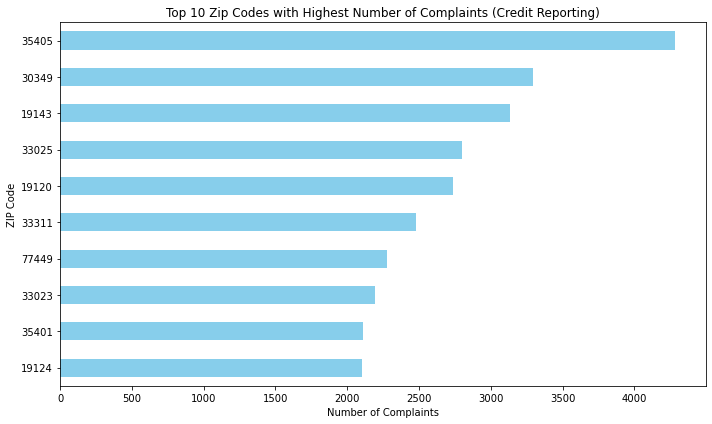

In [21]:
plt.figure(figsize=(10, 6))
top_10_zip_codes.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Zip Codes with Highest Number of Complaints (Credit Reporting)')
plt.xlabel('Number of Complaints')
plt.ylabel('ZIP Code')
plt.tight_layout()
plt.show()

In [22]:
print("Total Number of Complaints for All Zip Codes (Credit Reporting):")
print(zip_code_counts)

total_complaints = zip_code_counts.sum()

# top zip with omplaint counts
print("Top Zip Codes with the Highest Number of Complaints (Credit Reporting):")
print(top_10_zip_codes)

# All zip
print("\nTotal Number of Complaints for All Zip Codes (Credit Reporting):")
print(total_complaints)

Total Number of Complaints for All Zip Codes (Credit Reporting):
35405    4282
30349    3297
19143    3134
33025    2799
19120    2738
         ... 
76624       1
64102       1
24630       1
39476       1
15846       1
Name: zip_best, Length: 14531, dtype: int64
Top Zip Codes with the Highest Number of Complaints (Credit Reporting):
35405    4282
30349    3297
19143    3134
33025    2799
19120    2738
33311    2476
77449    2278
33023    2192
35401    2110
19124    2105
Name: zip_best, dtype: int64

Total Number of Complaints for All Zip Codes (Credit Reporting):
1217786


Crosschecked nnumber of complaints based on zip, it matches the count

In [23]:
zip_code_to_state = merged_data.set_index('zip_best')['State'].to_dict()

# Matchig zio with state
top_10_with_states_counts = [(zip_code, zip_code_to_state.get(zip_code, 'Unknown'), count) for zip_code, count in top_10_zip_codes.iteritems()]

# zip, state and complaint count
for zip_code, state, count in top_10_with_states_counts:
    print(f"ZIP Code: {zip_code}, State: {state}, Number of Complaints: {count}")

ZIP Code: 35405, State: AL, Number of Complaints: 4282
ZIP Code: 30349, State: GA, Number of Complaints: 3297
ZIP Code: 19143, State: PA, Number of Complaints: 3134
ZIP Code: 33025, State: FL, Number of Complaints: 2799
ZIP Code: 19120, State: PA, Number of Complaints: 2738
ZIP Code: 33311, State: FL, Number of Complaints: 2476
ZIP Code: 77449, State: TX, Number of Complaints: 2278
ZIP Code: 33023, State: FL, Number of Complaints: 2192
ZIP Code: 35401, State: AL, Number of Complaints: 2110
ZIP Code: 19124, State: PA, Number of Complaints: 2105


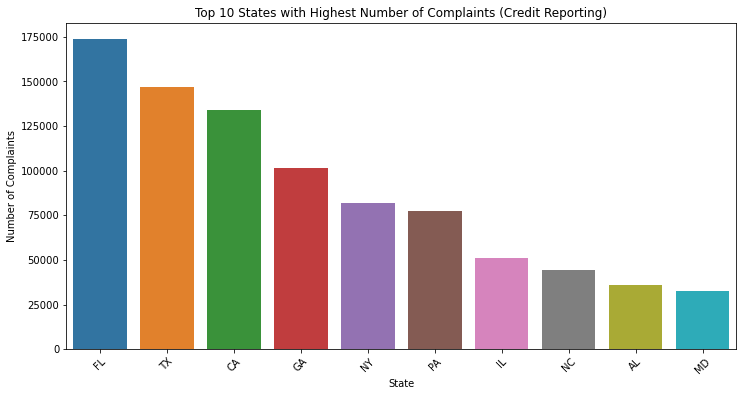

In [24]:
# fiktering df to include only complaints related to the "Credit reporting" product
credit_reporting_complaints = df_joined[df_joined['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports']

# number of complaints by state (count)
state_counts = credit_reporting_complaints['State'].value_counts()

# top 10 states with the highest number of complaints in the "Credit reporting" category
top_10_states = state_counts.head(10)

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values)
plt.title('Top 10 States with Highest Number of Complaints (Credit Reporting)')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

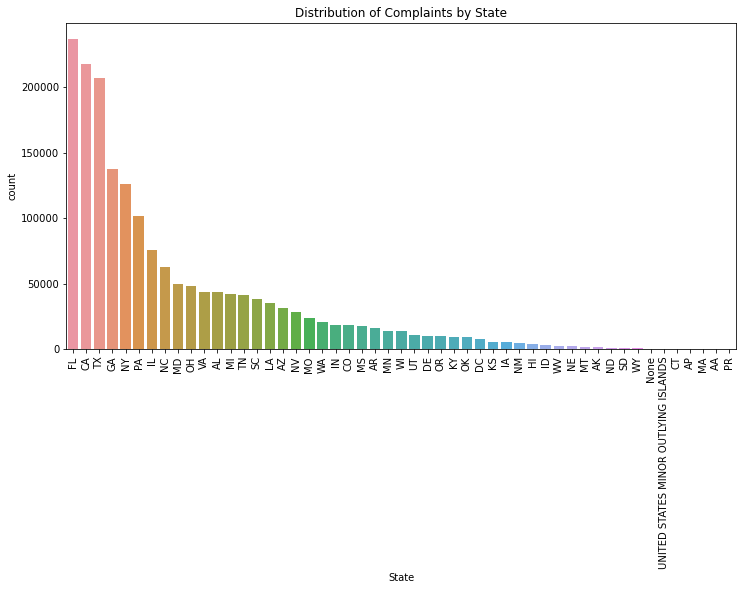

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df_joined, order=df_joined['State'].value_counts().index)
plt.title('Distribution of Complaints by State')
plt.xticks(rotation=90)
plt.show()

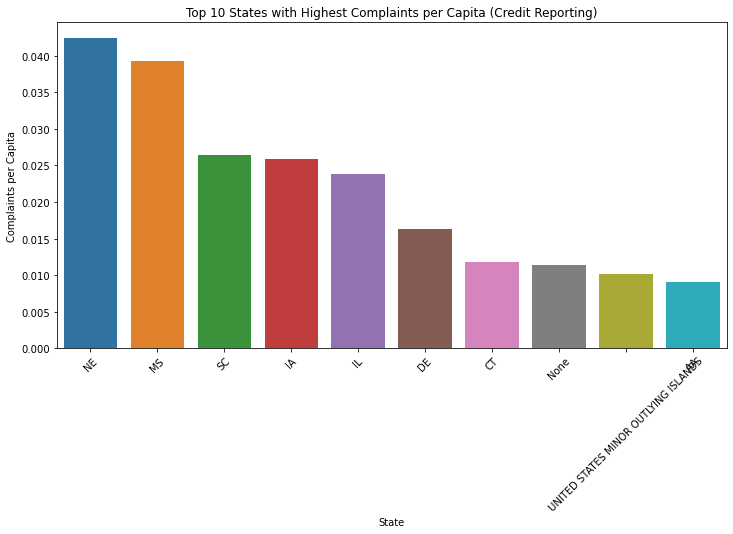

In [26]:
merged_data['Complaints_per_capita'] = merged_data['complaint_count'] / merged_data['pop']

# top 10 states with the highest complaints per capita
top_10_per_capita = merged_data.groupby('State')['Complaints_per_capita'].mean().nlargest(10)

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_per_capita.index, y=top_10_per_capita.values)
plt.title('Top 10 States with Highest Complaints per Capita (Credit Reporting)')
plt.xlabel('State')
plt.ylabel('Complaints per Capita')
plt.xticks(rotation=45)
plt.show()